In [92]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import pandas.io.sql as psql
import seaborn as sns
import numpy as np
import pyspark
from pyspark.sql import SparkSession



In [ ]:
spark = SparkSession.builder.master("local[1]").appName('ApiData.com').getOrCreate()

In [93]:
spark = SparkSession.builder.appName('ApiSpark').getOrCreate()

Py4JError: An error occurred while calling None.org.apache.spark.sql.SparkSession. Trace:
py4j.Py4JException: Constructor org.apache.spark.sql.SparkSession([class org.apache.spark.SparkContext, class java.util.HashMap]) does not exist
	at py4j.reflection.ReflectionEngine.getConstructor(ReflectionEngine.java:179)
	at py4j.reflection.ReflectionEngine.getConstructor(ReflectionEngine.java:196)
	at py4j.Gateway.invoke(Gateway.java:237)
	at py4j.commands.ConstructorCommand.invokeConstructor(ConstructorCommand.java:80)
	at py4j.commands.ConstructorCommand.execute(ConstructorCommand.java:69)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Unknown Source)



In [88]:
connection = pymysql.connect(
    host='localhost',
    user='root',
    password='password',
    database='creditcard_capstone'
)

cursor = connection.cursor()
sql = "SELECT * FROM CDW_SAPP_loan_application"
cursor.execute(sql)
result_set = cursor.fetchall()
data_frame = psql.read_sql(sql, con=connection)
pd.set_option("display.max_columns", None)
#print(data_frame.head())


cursor.close()
connection.close()

C:\Users\Learner_XZHCG225\AppData\Local\Temp\ipykernel_22476\1642014810.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_frame = psql.read_sql(sql, con=connection)


In [4]:
data_frame

,Application_ID,Application_Status,Credit_History,Dependents,Education,Gender,Income,Married,Property_Area,Self_Employed
0,LP001002,Y,1,0,Graduate,Male,medium,No,Urban,No
1,LP001003,N,1,1,Graduate,Male,medium,Yes,Rural,No
2,LP001005,Y,1,0,Graduate,Male,low,Yes,Urban,Yes
3,LP001006,Y,1,0,Not Graduate,Male,low,Yes,Urban,No
4,LP001008,Y,1,0,Graduate,Male,medium,No,Urban,No
...,...,...,...,...,...,...,...,...,...,...
506,LP002978,Y,1,0,Graduate,Female,low,No,Rural,No
507,LP002979,Y,1,3+,Graduate,Male,medium,Yes,Rural,No
508,LP002983,Y,1,1,Graduate,Male,medium,Yes,Urban,No
509,LP002984,Y,1,2,Graduate,Male,medium,Yes,Urban,No


Find and plot the percentage of applications approved for self-employed applicants.

  Self_Employed Application_Status  Application_ID
3           Yes                  Y              46
Percentage of applications approved for self-employed applicants:  3    9.001957
Name: Count_Percent, dtype: float64


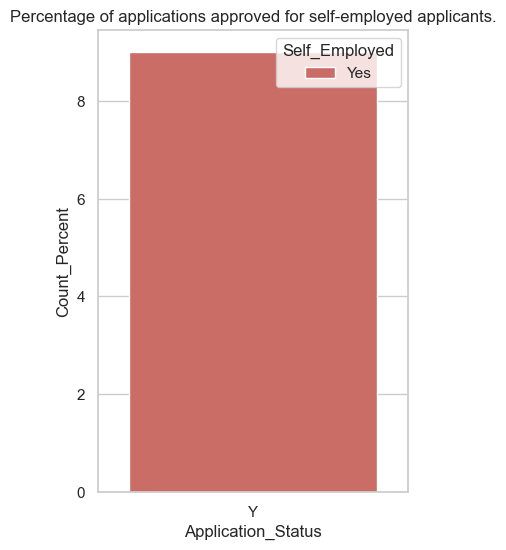

In [82]:

data_api = data_frame.groupby(['Self_Employed','Application_Status'])['Application_ID'].count()
data_api = data_api.reset_index()
total_applications = len(data_frame)
data_api = data_api[(data_api['Application_Status'] == 'Y') & (data_api['Self_Employed'] == 'Yes' ) ]
print(data_api)
data_api['Count_Percent'] = data_api['Application_ID']/total_applications * 100
print("Percentage of applications approved for self-employed applicants: ", data_api['Count_Percent'])
data_api
sns.set(rc={"figure.figsize":(4,6)})
sns.set_theme(style="whitegrid", palette="hls")
sns.barplot(x ='Application_Status',
            y = 'Count_Percent',
            hue='Self_Employed',
            data = data_api).set(title ="Percentage of applications approved for self-employed applicants." )
 
# Show the plot
plt.show()


In [ ]:
data_api = data_frame.groupby(['Self_Employed','Application_Status'])['Application_ID'].count()
data_api = data_api.reset_index()
total_applications = len(data_frame)
data_api = data_api[(data_api['Application_Status'] == 'Y') & (data_api['Self_Employed'] == 'Yes' ) ]
data_api['Count_Percent'] = data_api['Application_ID']/total_applications * 100
data_api
data_api.plot(kind='bar', figsize = (8,8))
plt.title('Percentage of applications approved for self-employed applicants')
plt.xlabel('Self_Employed')
plt.ylabel('Count_Percent')
plt.show()


In [89]:
spark = SparkSession.builder.appName('ApiSpark').getOrCreate()

Py4JError: An error occurred while calling None.org.apache.spark.sql.SparkSession. Trace:
py4j.Py4JException: Constructor org.apache.spark.sql.SparkSession([class org.apache.spark.SparkContext, class java.util.HashMap]) does not exist
	at py4j.reflection.ReflectionEngine.getConstructor(ReflectionEngine.java:179)
	at py4j.reflection.ReflectionEngine.getConstructor(ReflectionEngine.java:196)
	at py4j.Gateway.invoke(Gateway.java:237)
	at py4j.commands.ConstructorCommand.invokeConstructor(ConstructorCommand.java:80)
	at py4j.commands.ConstructorCommand.execute(ConstructorCommand.java:69)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Unknown Source)



In [85]:
spark_df = createDataFrame(data_frame)

NameError: name 'createDataFrame' is not defined

Find the percentage of rejection for married male applicants.

In [188]:
data_frame

,Application_ID,Application_Status,Credit_History,Dependents,Education,Gender,Income,Married,Property_Area,Self_Employed
0,LP001002,Y,1,0,Graduate,Male,medium,No,Urban,No
1,LP001003,N,1,1,Graduate,Male,medium,Yes,Rural,No
2,LP001005,Y,1,0,Graduate,Male,low,Yes,Urban,Yes
3,LP001006,Y,1,0,Not Graduate,Male,low,Yes,Urban,No
4,LP001008,Y,1,0,Graduate,Male,medium,No,Urban,No
...,...,...,...,...,...,...,...,...,...,...
506,LP002978,Y,1,0,Graduate,Female,low,No,Rural,No
507,LP002979,Y,1,3+,Graduate,Male,medium,Yes,Rural,No
508,LP002983,Y,1,1,Graduate,Male,medium,Yes,Urban,No
509,LP002984,Y,1,2,Graduate,Male,medium,Yes,Urban,No


In [59]:
df_maarried_male = data_frame.groupby(["Married","Application_Status","Gender"])["Application_ID"].count()
df_maarried_male = df_maarried_male.reset_index()
print(df_maarried_male)
total_applications = len(data_frame)
df_maarried_male = df_maarried_male[(df_maarried_male['Married'] == 'Yes') & (df_maarried_male['Application_Status'] == 'N' ) & (df_maarried_male['Gender'] == 'Male')]
df_maarried_male['Count_Percent'] = df_maarried_male['Application_ID']/total_applications * 100
df_maarried_male

  Married Application_Status  Gender  Application_ID
0      No                  N  Female              26
1      No                  N    Male              43
2      No                  Y  Female              40
3      No                  Y    Male              71
4     Yes                  N  Female               8
5     Yes                  N    Male              87
6     Yes                  Y  Female              17
7     Yes                  Y    Male             219


,Married,Application_Status,Gender,Application_ID,Count_Percent
5,Yes,N,Male,87,17.02544


[Text(0.5, 1.0, 'Percentage of rejection for married male applicants.')]

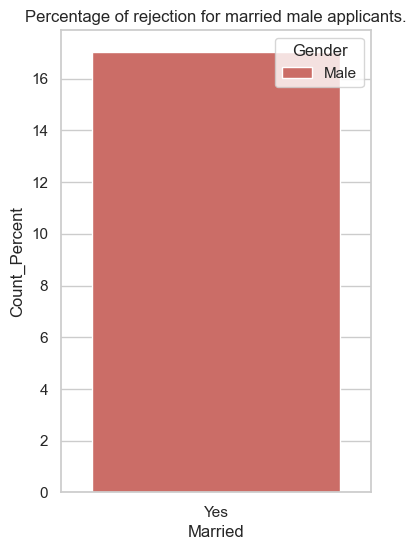

In [81]:
sns.set(rc={"figure.figsize":(4,6)})
sns.set_theme(style="whitegrid", palette="hls")
sns.barplot(x ='Married',
            y = 'Count_Percent',
            hue='Gender',
            data = df_maarried_male).set(title ="Percentage of rejection for married male applicants." )

plot the top three months with the largest transaction data.

In [ ]:
df_months = data_frame.groupby('MONTH')['TRANSACTION_VALUE'].sum().reset_index()
print(df_months)
df_months = df_months.sort_values(by=['TRANSACTION_VALUE'], ascending=False)
df_months = df_months.sort_values(by=['MONTH'], ascending=False)
df_months = df_months[:3]
plt.rcParams["figure.figsize"] = [15, 5]
plt.rcParams["figure.autolayout"] = True
plt.plot(df_months['MONTH'], df_months['TRANSACTION_VALUE'], ls='-', c='g', lw='3', marker='o')
plt.title('Top Three Months With Highest Number Of Transactions')
plt.ylabel('Transaction Amount')
plt.xlabel('Month by Number')
plt.text(10, 202584, 'October has the most transactions: $202583.89')  # see note below
plt.show()

 plot which branch processed the highest total dollar value of healthcare transactions.

In [ ]:
mod5 = df.select('BRANCH_CODE', 'TRANSACTION_VALUE').filter(df.TRANSACTION_TYPE == 'Healthcare')
    pandas_df = mod5.toPandas()
    pandas_df = pandas_df.groupby('BRANCH_CODE')['TRANSACTION_VALUE'].sum().reset_index()
    pandas_df = pandas_df.sort_values(by=['TRANSACTION_VALUE'], ascending=False)
    pandas_df = pandas_df[:10]
    pandas_df = pandas_df.sort_values(by=['BRANCH_CODE'], ascending=True)
    print(pandas_df)
    plt.rcParams["figure.figsize"] = [15, 5]
    plt.rcParams["figure.autolayout"] = True
    plt.plot(pandas_df['BRANCH_CODE'], pandas_df['TRANSACTION_VALUE'], ls='-', c='purple', marker='o')
    plt.xticks(pandas_df['BRANCH_CODE'])
    plt.title('Which Branch Has Highest Number Of Healthcare Transactions')
    plt.ylabel('Transaction Amount')
    plt.xlabel('Branch Code')
    plt.text(25, 4371, 'Branch code: 25 has the most Healthcare transactions: $ 4370.18')  # see note below
    plt.show()

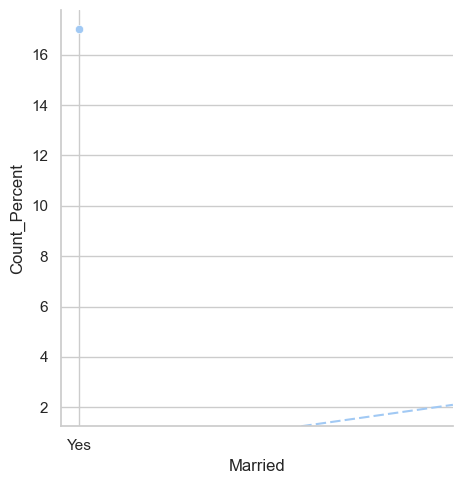

In [80]:
g = sns.relplot(data=df_maarried_male, x="Married", y="Count_Percent")
g.ax.axline(xy1=(10, 2), slope=.2, color="b", dashes=(5, 2))